<a href="https://colab.research.google.com/github/chandeepasamaraweera/Time-series-forecasting-of-CO2-levels-using-various-regression-models-and-ARIMA-Prophet-models/blob/main/ML_Project_Air_Quality_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
dataframe = pd.read_csv(r'/content/drive/MyDrive/Project/air_quality_hourly_data_Colombo_METDept.csv')

In [10]:
dataframe.head()

,Unnamed: 0,Time,CO2
0,0,2022-12-21 00:00:00,562
1,1,2022-12-21 01:00:00,511
2,2,2022-12-21 02:00:00,511
3,3,2022-12-21 03:00:00,507
4,4,2022-12-21 04:00:00,498


removes the column names Unnamed : 0 from the dataframe

In [11]:
dataframe.drop('Unnamed: 0',axis=1,inplace=True)

analysing the shape of the data set

In [12]:
print(f'Dataset shape {dataframe.shape}')

Dataset shape (5943, 2)


do we have missing points in the dataset

In [13]:
print("missing value count")
print(dataframe.isnull().sum())

missing value count
Time      0
CO2     212
dtype: int64


what are the data types of our data

In [14]:
print("data types : ")
print(dataframe.dtypes)

data types : 
Time    object
CO2     object
dtype: object


should all our data points be unique

In [15]:
unique_counts = dataframe.nunique()
print(unique_counts)

Time    5943
CO2      238
dtype: int64


lets clean our data

should we change our original data

In [16]:
dataframe_cleaned = dataframe.copy()

let's remove the rows that have missing values

In [17]:
dataframe_cleaned.dropna(inplace=True)


In [18]:
print("missing value count in the cleaned dataset")
print(dataframe_cleaned.isnull().sum())

missing value count in the cleaned dataset
Time    0
CO2     0
dtype: int64


let's start by converting our data to the correct data type

In [19]:
dataframe_cleaned['CO2'] = pd.to_numeric(dataframe_cleaned['CO2'], errors='coerce')
dataframe_cleaned['Time'] = pd.to_datetime(dataframe_cleaned['Time'], format ='mixed' ,errors='coerce')


more missing values?

In [20]:
print(dataframe_cleaned.isnull().sum())

Time       0
CO2     2648
dtype: int64


In [21]:
dataframe_cleaned.dropna(inplace=True)

In [22]:
print(dataframe_cleaned.isnull().sum())

Time    0
CO2     0
dtype: int64


In [23]:
print("Data after cleaning ",dataframe_cleaned.shape)

Data after cleaning  (3083, 2)


let's visualize our data


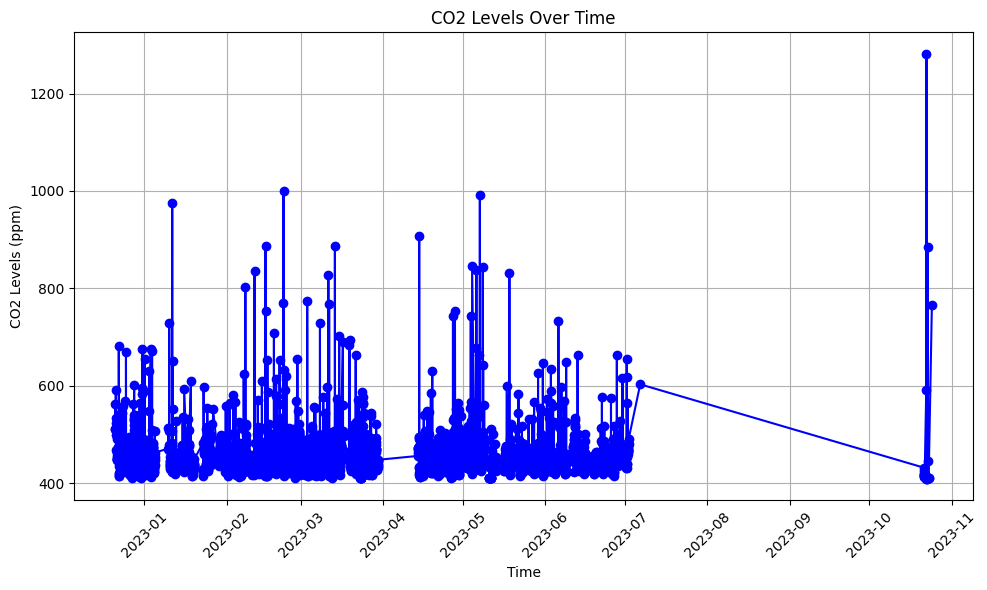

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dataframe_cleaned['Time'], dataframe_cleaned['CO2'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('CO2 Levels Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Levels (ppm)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

how do we fix the gaps?


In [25]:
dataframe_cleaned['TimeDelta'] = dataframe_cleaned['Time'].diff()

diff() identifies the gaps

In [26]:
dataframe_cleaned

,Time,CO2,TimeDelta
0,2022-12-21 00:00:00,562.0,NaT
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
...,...,...,...
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00
3294,2023-10-23 07:00:00,410.0,0 days 01:00:00


In [27]:
continuous_rows = dataframe_cleaned.copy()
continuous_rows = continuous_rows[continuous_rows['TimeDelta'] == pd.Timedelta(hours=1)]
continuous_rows

,Time,CO2,TimeDelta
1,2022-12-21 01:00:00,511.0,0 days 01:00:00
2,2022-12-21 02:00:00,511.0,0 days 01:00:00
3,2022-12-21 03:00:00,507.0,0 days 01:00:00
4,2022-12-21 04:00:00,498.0,0 days 01:00:00
5,2022-12-21 05:00:00,591.0,0 days 01:00:00
...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00


In [28]:
continuous_rows['index_diff'] = continuous_rows.index.diff()
continuous_rows

,Time,CO2,TimeDelta,index_diff
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0
...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0


In [29]:
continuous_rows['group'] = (continuous_rows['index_diff'] != 1).cumsum()
continuous_rows

,Time,CO2,TimeDelta,index_diff,group
1,2022-12-21 01:00:00,511.0,0 days 01:00:00,NaN,1
2,2022-12-21 02:00:00,511.0,0 days 01:00:00,1.0,1
3,2022-12-21 03:00:00,507.0,0 days 01:00:00,1.0,1
4,2022-12-21 04:00:00,498.0,0 days 01:00:00,1.0,1
5,2022-12-21 05:00:00,591.0,0 days 01:00:00,1.0,1
...,...,...,...,...,...
3290,2023-10-23 03:00:00,410.0,0 days 01:00:00,1.0,123
3291,2023-10-23 04:00:00,410.0,0 days 01:00:00,1.0,123
3292,2023-10-23 05:00:00,410.0,0 days 01:00:00,1.0,123
3293,2023-10-23 06:00:00,410.0,0 days 01:00:00,1.0,123


In [30]:
largest_group = continuous_rows['group'].value_counts().idxmax()

In [31]:
largest_group
largest_continuous_data = continuous_rows[continuous_rows['group'] == largest_group]

In [32]:
largest_continuous_data

,Time,CO2,TimeDelta,index_diff,group
53,2022-12-23 06:00:00,457.0,0 days 01:00:00,3.0,4
54,2022-12-23 07:00:00,463.0,0 days 01:00:00,1.0,4
55,2022-12-23 08:00:00,469.0,0 days 01:00:00,1.0,4
56,2022-12-23 09:00:00,545.0,0 days 01:00:00,1.0,4
57,2022-12-23 10:00:00,442.0,0 days 01:00:00,1.0,4
...,...,...,...,...,...
273,2023-01-01 10:00:00,466.0,0 days 01:00:00,1.0,4
274,2023-01-01 11:00:00,447.0,0 days 01:00:00,1.0,4
275,2023-01-01 12:00:00,431.0,0 days 01:00:00,1.0,4
276,2023-01-01 13:00:00,418.0,0 days 01:00:00,1.0,4


In [33]:
largest_continuous_data = largest_continuous_data.drop(['index_diff', 'group'], axis=1)

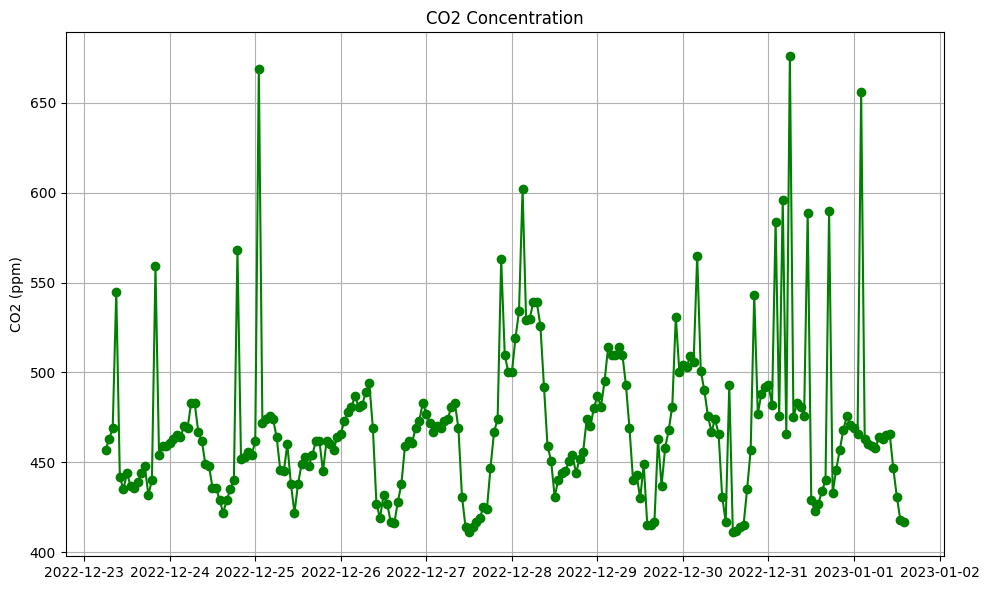

In [34]:
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.plot(largest_continuous_data['Time'], largest_continuous_data['CO2'], color='green', marker='o')
axs.set_title('CO2 Concentration')
axs.set_ylabel('CO2 (ppm)')
axs.grid(True)


plt.tight_layout()
plt.show()

In [35]:
largest_continuous_data.shape

(225, 3)

In [36]:
(len(largest_continuous_data)/len(dataframe))*100

3.7859666834931853

let's start training the models


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

df = largest_continuous_data.copy()

df['year'] = df['Time'].dt.year
df['month']= df['Time'].dt.month
df['day'] = df[ 'Time'].dt.day
df['hour']= df['Time'].dt.hour

X = df[['year', 'month', 'day', 'hour']]
y = df['CO2']



split_point = int(len(df) * 0.8)

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}


results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    tscv = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'Cross-val MSE': -np.mean(scores),
        'Test MSE': mse,
        'Test R2': r2
    }


for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


best_model = min(results, key=lambda x: results[x]['Test MSE'])
print(f"\nBest model based on Test MSE: {best_model}")

best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', models[best_model])
])
best_pipeline.fit(X_train, y_train)


sample_date = pd.to_datetime('2023-08-25 14:00:00')
sample_input = pd.DataFrame({
    'year': [sample_date.year],
    'month': [sample_date.month],
    'day': [sample_date.day],
    'hour': [sample_date.hour]
})

prediction = best_pipeline.predict(sample_input)
print(f"\nPredicted CO2 level for {sample_date}: {prediction[0]:.2f}")




Linear Regression:
  Cross-val MSE: 1448.9454
  Test MSE: 3782.5027
  Test R2: -0.0951

Random Forest:
  Cross-val MSE: 1273.0261
  Test MSE: 3280.2529
  Test R2: 0.0503

XGBoost:
  Cross-val MSE: 1589.1661
  Test MSE: 3758.9011
  Test R2: -0.0882

Best model based on Test MSE: Random Forest

Predicted CO2 level for 2023-08-25 14:00:00: 449.48


can we do even better?

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt
from warnings import catch_warnings, filterwarnings
filterwarnings("ignore")


def predict_co2_levels(df, forecast_horizon=10):
    """
    Predict CO2 levels using ARIMA model.

    Parameters:
    df (pandas.DataFrame): DataFrame with 'Time' and 'CO2' columns
    forecast_horizon (int): Number of future time points to predict

    Returns:
    tuple: (predictions, mse, rmse)
    """

    df = df.sort_values('Time')


    df.set_index('Time', inplace=True)


    # You may need to adjust the order (p,d,q) based on your specific data
    model = ARIMA(df['CO2'], order=(1,1,1))
    results = model.fit()

    # Make predictions
    predictions = results.forecast(steps=forecast_horizon)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(df['CO2'][-forecast_horizon:], predictions)

    return predictions, mse

# Example usage:
# Assuming 'df' is your DataFrame with 'Time' and 'CO2' columns
predictions, mse, = predict_co2_levels(largest_continuous_data)
# print(f"Predictions: {predictions}")
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 893.2996221434248


In [43]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def predict_co2_levels_for_timerange(df, start_time, end_time):
    """
    Predict CO2 levels for a specific time range using ARIMA model.

    Parameters:
    df (pandas.DataFrame): DataFrame with 'Time' and 'CO2' columns
    start_time (str): Start time in format 'YYYY-MM-DD HH:MM:SS'
    end_time (str): End time in format 'YYYY-MM-DD HH:MM:SS'

    Returns:
    pandas.DataFrame: DataFrame with 'Time' and 'Predicted_CO2' columns
    """

    df = df.sort_values('Time')
    df.set_index('Time', inplace=True)


    model = ARIMA(df['CO2'], order=(5,1,5))
    results = model.fit()


    date_range = pd.date_range(start=start_time, end=end_time, freq='H')
    predictions = results.forecast(steps=len(date_range))
    prediction_df = pd.DataFrame({
        'Time': date_range,
        'Predicted_CO2': predictions
    })

    prediction_df.set_index('Time', inplace=True)
    return prediction_df


start_time = '2022-12-30 18:00:00'
end_time = '2023-01-01 14:00:00'

predicted_co2 = predict_co2_levels_for_timerange(largest_continuous_data, start_time, end_time)
print(predicted_co2)

                     Predicted_CO2
Time                              
2022-12-30 18:00:00     430.308864
2022-12-30 19:00:00     447.903925
2022-12-30 20:00:00     441.934327
2022-12-30 21:00:00     422.759819
2022-12-30 22:00:00     422.272487
2022-12-30 23:00:00     439.174037
2022-12-31 00:00:00     448.114643
2022-12-31 01:00:00     434.178370
2022-12-31 02:00:00     421.458608
2022-12-31 03:00:00     428.143997
2022-12-31 04:00:00     444.499638
2022-12-31 05:00:00     443.329478
2022-12-31 06:00:00     428.661989
2022-12-31 07:00:00     422.368502
2022-12-31 08:00:00     435.250945
2022-12-31 09:00:00     445.103465
2022-12-31 10:00:00     438.212392
2022-12-31 11:00:00     424.585098
2022-12-31 12:00:00     427.007910
2022-12-31 13:00:00     439.641572
2022-12-31 14:00:00     443.849198
2022-12-31 15:00:00     432.121850
2022-12-31 16:00:00     424.674839
2022-12-31 17:00:00     431.502110
2022-12-31 18:00:00     442.744653
2022-12-31 19:00:00     439.469520
2022-12-31 20:00:00 

we can do even better!!!

In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt
from warnings import catch_warnings, filterwarnings
filterwarnings("ignore")


def predict_co2_levels(df, forecast_horizon=10):
    """
    Predict CO2 levels using ARIMA model.

    Parameters:
    df (pandas.DataFrame): DataFrame with 'Time' and 'CO2' columns
    forecast_horizon (int): Number of future time points to predict

    Returns:
    tuple: (predictions, mse, rmse)
    """

    df = df.sort_values('Time')


    df.set_index('Time', inplace=True)


    # You may need to adjust the order (p,d,q) based on your specific data
    model = ARIMA(df['CO2'], order=(5,1,5))
    results = model.fit()



    # Make predictions
    predictions = results.forecast(steps=forecast_horizon)

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = mean_squared_error(df['CO2'][-forecast_horizon:], predictions)

    return predictions, mse

# Example usage:
# Assuming 'df' is your DataFrame with 'Time' and 'CO2' columns
predictions, mse, = predict_co2_levels(largest_continuous_data)
# print(f"Predictions: {predictions}")
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 572.4045801460318


using prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqwof6h_/_tg0r_zj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzqwof6h_/a8mt1w6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33173', 'data', 'file=/tmp/tmpzqwof6h_/_tg0r_zj.json', 'init=/tmp/tmpzqwof6h_/a8mt1w6o.json', 'output', 'file=/tmp/tmpzqwof6h_/prophet_modelhvkidipt/prophet_model-20250224035854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:58:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:58:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


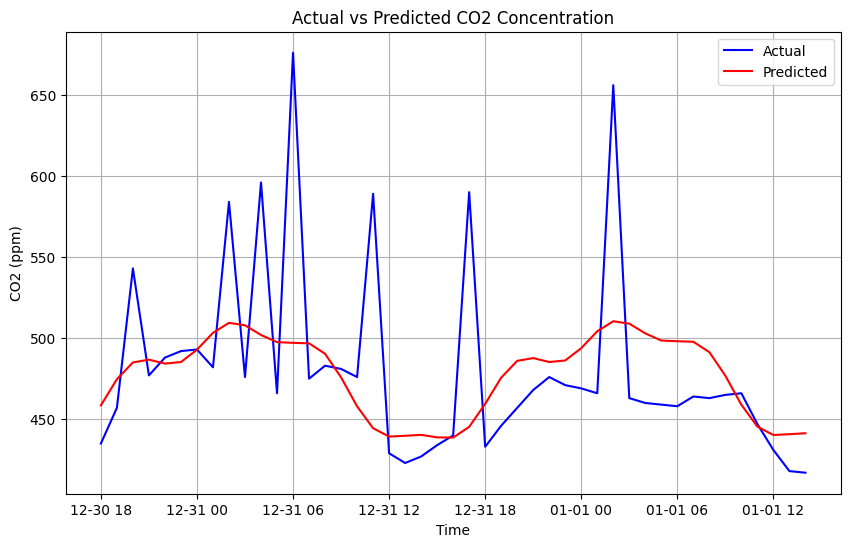

Root Mean Squared Error (RMSE): 54.452076807335985
Mean Squared Error (RMSE): 2965.0286686320173


In [40]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with the data, and it contains the 'Time' and 'CO2' columns

# Prepare the data for the Prophet model
df_prophet = largest_continuous_data[['Time', 'CO2']].rename(columns={'Time': 'ds', 'CO2': 'y'})

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
train_data = df_prophet[:train_size]
test_data = df_prophet[train_size:]

# Create and fit the Prophet model with the training data
model = Prophet()
model.fit(train_data)

# Make predictions on the test data
forecast = model.predict(test_data[['ds']])

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='blue')
plt.plot(test_data['ds'], forecast['yhat'], label='Predicted', color='red')
plt.title('Actual vs Predicted CO2 Concentration')
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Error (RMSE):', mse)

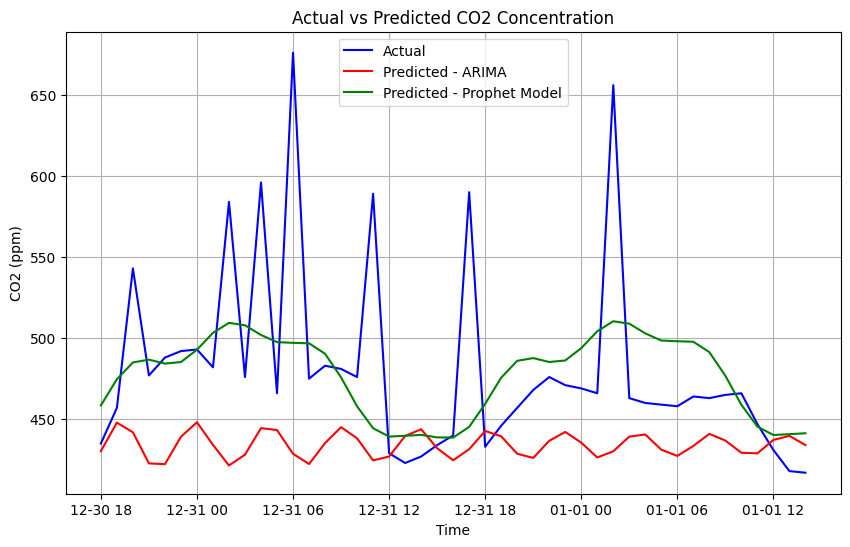

In [46]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='blue')
plt.plot(test_data['ds'], predicted_co2['Predicted_CO2'], label='Predicted - ARIMA', color='red')
plt.plot(test_data['ds'], forecast['yhat'], label='Predicted - Prophet Model', color='green')
plt.title('Actual vs Predicted CO2 Concentration')
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
def directional_accuracy(actual, predicted):
    actual_diff = np.diff(actual)
    pred_diff = np.diff(predicted)
    correct_direction = np.sign(actual_diff) == np.sign(pred_diff)
    return np.mean(correct_direction)

da_arima = directional_accuracy(actual=test_data['y'], predicted=predicted_co2['Predicted_CO2'])
da_prophet = directional_accuracy(actual=test_data['y'], predicted=forecast['yhat'])

In [49]:
print(da_arima , da_prophet)

0.4772727272727273 0.5454545454545454


In [50]:
import numpy as np
from scipy import signal

def trend_adjusted_mse(actual, predicted, window_length=24):
    """
    Calculate the Trend-adjusted Mean Squared Error.

    Parameters:
    actual (array-like): The actual observed values
    predicted (array-like): The predicted values
    window_length (int): The window length for the trend estimation (default: 24)

    Returns:
    float: The trend-adjusted MSE
    """
    # Ensure inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Estimate trend using Savitzky-Golay filter
    trend_actual = signal.savgol_filter(actual, window_length, 3)
    trend_predicted = signal.savgol_filter(predicted, window_length, 3)

    # Detrend the series
    detrended_actual = actual - trend_actual
    detrended_predicted = predicted - trend_predicted

    # Calculate MSE on detrended data
    mse = np.mean((detrended_actual - detrended_predicted)**2)

    return mse

# Usage example:
ta_mse_arima = trend_adjusted_mse(actual=test_data['y'], predicted=predicted_co2['Predicted_CO2'])
ta_mse_prophet = trend_adjusted_mse(actual=test_data['y'], predicted=forecast['yhat'])

In [51]:
print(ta_mse_arima , ta_mse_prophet)

2877.709293372531 2672.0751954264006


In [52]:
import numpy as np

def mean_absolute_scaled_error(actual, predicted, seasonal_period=1):
    """
    Calculate the Mean Absolute Scaled Error (MASE).

    Parameters:
    actual (array-like): The actual observed values
    predicted (array-like): The predicted values
    seasonal_period (int): The seasonal period of the time series (default: 1 for non-seasonal data)

    Returns:
    float: The MASE value
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate errors
    errors = np.abs(actual - predicted)

    # Calculate the mean absolute error of the naive forecast
    naive_errors = np.abs(actual[seasonal_period:] - actual[:-seasonal_period])
    mae_naive = np.mean(naive_errors)

    # Calculate MASE
    mase = np.mean(errors) / mae_naive

    return mase

# Usage example:
mase_arima = mean_absolute_scaled_error(actual=test_data['y'], predicted=predicted_co2['Predicted_CO2'])
mase_prophet = mean_absolute_scaled_error(actual=test_data['y'], predicted=forecast['yhat'])

In [53]:
print(mase_arima , mase_prophet)


1.0256880264407806 0.7077917976959983


In [54]:
import numpy as np

def mean_absolute_error(actual, predicted):
    """
    Calculate the Mean Absolute Error (MAE).

    Parameters:
    actual (array-like): The actual observed values
    predicted (array-like): The predicted values

    Returns:
    float: The MAE value
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Calculate absolute errors
    errors = np.abs(actual - predicted)

    # Calculate mean of absolute errors
    mae = np.mean(errors)

    return mae

# Usage example:
mae_arima = mean_absolute_error(actual=test_data['y'], predicted=predicted_co2['Predicted_CO2'])
mae_prophet = mean_absolute_error(actual=test_data['y'], predicted=forecast['yhat'])

In [55]:
print(mae_arima , mae_prophet)

51.051290406938854 35.22872811259628


let's save our prophet model

In [56]:
import joblib
joblib.dump(model, 'prophet_model.pkl')

['prophet_model.pkl']